<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.228289,55.335619,-0.000409,164.563499,164.564236,-0.000738
1,0.0,1.0,33.406957,94.469779,-0.000412,137.876324,137.876497,-0.000173
2,0.0,2.0,44.138893,38.361556,-0.001026,92.499423,92.500150,-0.000728
3,0.0,3.0,58.897070,62.000926,-0.001642,130.896355,130.897924,-0.001570
4,0.0,4.0,25.563286,54.594485,0.000074,90.157845,90.157328,0.000517
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,36.081661,46.753544,0.001403,92.836607,92.835280,0.001327
119996,999.0,116.0,40.076408,42.587943,-0.000014,92.664337,92.664483,-0.000146
119997,999.0,117.0,66.144565,85.563509,0.000023,161.708097,161.708147,-0.000051
119998,999.0,118.0,39.530506,87.415590,0.000011,136.946106,136.945950,0.000156


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.228289  55.335619 -0.000409  164.563499  164.564236 -0.000738
      1.0    33.406957  94.469779 -0.000412  137.876324  137.876497 -0.000173
      2.0    44.138893  38.361556 -0.001026   92.499423   92.500150 -0.000728
      3.0    58.897070  62.000926 -0.001642  130.896355  130.897924 -0.001570
      4.0    25.563286  54.594485  0.000074   90.157845   90.157328  0.000517
...                ...        ...       ...         ...         ...       ...
999.0 115.0  36.081661  46.753544  0.001403   92.836607   92.835280  0.001327
      116.0  40.076408  42.587943 -0.000014   92.664337   92.664483 -0.000146
      117.0  66.144565  85.563509  0.000023  161.708097  161.708147 -0.000051
      118.0  39.530506  87.415590  0.000011  136.946106  136.945950  0.000156
      119.0  61.766720  56.118208 -0.000283  127.884645  127.885146 -0.000501

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.228289  55.335619 -0.000409  164.563499  164.564236 -0.000738
      1.0    33.406957  94.469779 -0.000412  137.876324  137.876497 -0.000173
      2.0    44.138893  38.361556 -0.001026   92.499423   92.500150 -0.000728
      3.0    58.897070  62.000926 -0.001642  130.896355  130.897924 -0.001570
      4.0    25.563286  54.594485  0.000074   90.157845   90.157328  0.000517
...                ...        ...       ...         ...         ...       ...
999.0 115.0  36.081661  46.753544  0.001403   92.836607   92.835280  0.001327
      116.0  40.076408  42.587943 -0.000014   92.664337   92.664483 -0.000146
      117.0  66.144565  85.563509  0.000023  161.708097  161.708147 -0.000051
      118.0  39.530506  87.415590  0.000011  136.946106  136.945950  0.000156
      119.0  61.766720  56.118208 -0.000283  127.884645  127.885146 -0.000501

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.228289,55.335619,-0.000409,164.563499,164.564236,-0.000738
1,0.0,1.0,33.406957,94.469779,-0.000412,137.876324,137.876497,-0.000173
2,0.0,2.0,44.138893,38.361556,-0.001026,92.499423,92.500150,-0.000728
3,0.0,3.0,58.897070,62.000926,-0.001642,130.896355,130.897924,-0.001570
4,0.0,4.0,25.563286,54.594485,0.000074,90.157845,90.157328,0.000517
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,36.081661,46.753544,0.001403,92.836607,92.835280,0.001327
119996,999.0,116.0,40.076408,42.587943,-0.000014,92.664337,92.664483,-0.000146
119997,999.0,117.0,66.144565,85.563509,0.000023,161.708097,161.708147,-0.000051
119998,999.0,118.0,39.530506,87.415590,0.000011,136.946106,136.945950,0.000156


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.228289  55.335619 -0.000409  164.563499  164.564236 -0.000738
      1.0    33.406957  94.469779 -0.000412  137.876324  137.876497 -0.000173
      2.0    44.138893  38.361556 -0.001026   92.499423   92.500150 -0.000728
      3.0    58.897070  62.000926 -0.001642  130.896355  130.897924 -0.001570
      4.0    25.563286  54.594485  0.000074   90.157845   90.157328  0.000517
...                ...        ...       ...         ...         ...       ...
999.0 115.0  36.081661  46.753544  0.001403   92.836607   92.835280  0.001327
      116.0  40.076408  42.587943 -0.000014   92.664337   92.664483 -0.000146
      117.0  66.144565  85.563509  0.000023  161.708097  161.708147 -0.000051
      118.0  39.530506  87.415590  0.000011  136.946106  136.945950  0.000156
      119.0  61.766720  56.118208 -0.000283  127.884645  127.885146 -0.000501

[120000 rows x 6 columns]

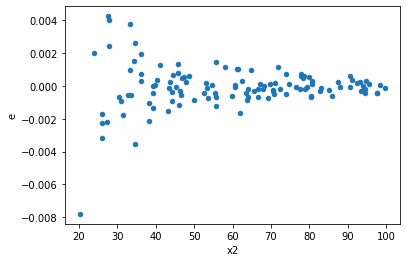

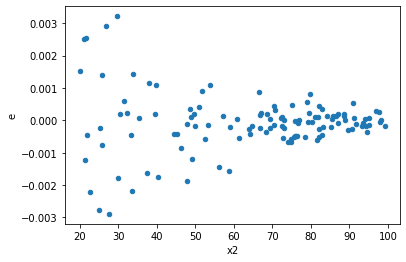

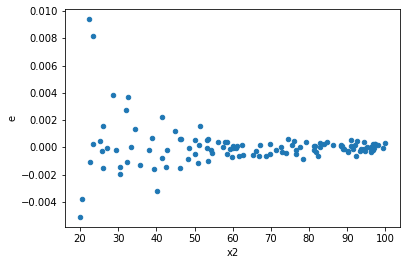

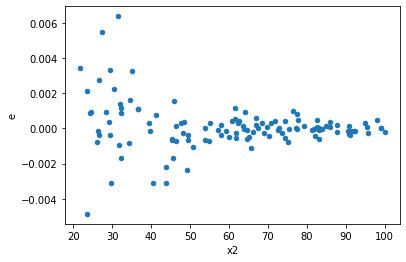

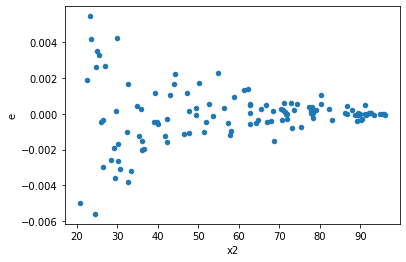

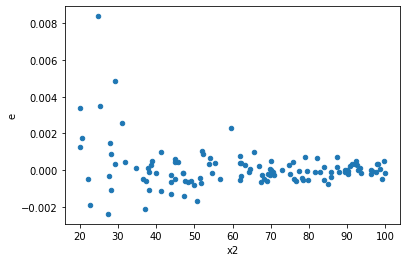

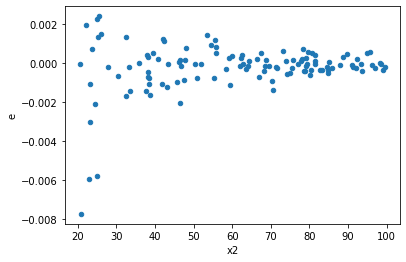

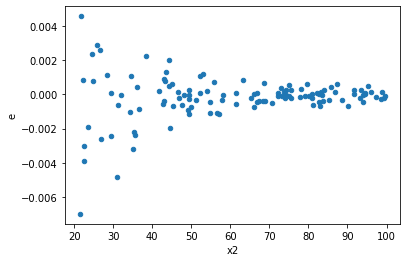

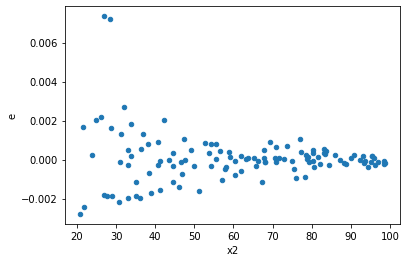

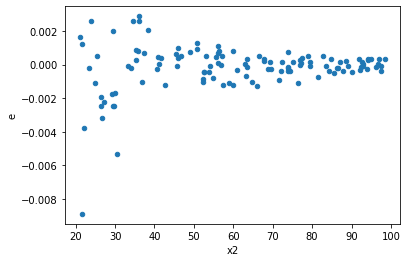

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,61.0,55.0,4.45881781001326e-05,0.0001545754322463601,7.30953739346436e-07,2.8104624044792746e-06,3.8449251343760538,1.118960766710586e-06,0.9999994405196166,5.59480383355293e-07,Reject001=0 : Heteroscedasticity
2.0,54.0,62.0,1.36895055008596e-05,0.0002657511102096832,2.5350936112702965e-07,4.286308229188439e-06,16.907889358139464,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,61.0,55.0,4.587283843018524e-05,0.00017010269841847257,7.520137447571351e-07,3.0927763348813193e-06,4.112659318321556,3.502256535892201e-07,0.9999998248871732,1.7511282679461004e-07,Reject001=0 : Heteroscedasticity
7.0,51.0,65.0,2.7142287399555725e-05,0.0001770239357590132,5.322017137167789e-07,2.72344516552328e-06,5.117317542071299,1.592082021772967e-09,0.999999999203959,7.960410108864835e-10,Reject001=0 : Heteroscedasticity
8.0,63.0,53.0,3.1397674060606605e-05,0.00017372211561237407,4.983757787397873e-07,3.277775766271209e-06,6.57691626699741,6.935385599149413e-11,0.9999999999653231,3.4676927995747064e-11,Reject001=0 : Heteroscedasticity
12.0,66.0,50.0,3.493562044469244e-05,0.00023517474294261812,5.2932758249534e-07,4.703494858852362e-06,8.885792115119507,3.8768988019910466e-13,0.9999999999998062,1.9384494009955233e-13,Reject001=0 : Heteroscedasticity
13.0,65.0,51.0,2.2145864718102948e-05,0.0001308929959762362,3.4070561104773766e-07,2.5665293328673766e-06,7.53298228630514,7.979839011795775e-12,0.9999999999960101,3.9899195058978876e-12,Reject001=0 : Heteroscedasticity
16.0,47.0,69.0,7.3886771023687366e-06,0.00021459106056786575,1.572058957950795e-07,3.110015370548779e-06,19.783070824536605,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
18.0,56.0,60.0,2.576147626111078e-05,0.000286877356148292,4.600263618055496e-07,4.7812892691382e-06,10.393511472629958,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,61.0,55.0,4.45881781001326e-05,0.0001545754322463601,7.30953739346436e-07,2.8104624044792746e-06,3.8449251343760538,1.118960766710586e-06,Reject001=0 : Heteroscedasticity
1.0,54.0,62.0,8.684324542279326e-05,8.633437630278824e-06,1.6082082485702456e-06,1.3924899403675523e-07,0.08658641948923751,2.3762258143872026e-16,Reject001=0 : Heteroscedasticity
2.0,54.0,62.0,1.36895055008596e-05,0.0002657511102096832,2.5350936112702965e-07,4.286308229188439e-06,16.907889358139464,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,61.0,55.0,4.587283843018524e-05,0.00017010269841847257,7.520137447571351e-07,3.0927763348813193e-06,4.112659318321556,3.502256535892201e-07,Reject001=0 : Heteroscedasticity
4.0,55.0,61.0,0.00026594010528847617,2.7462129975783218e-05,4.8352746416086575e-06,4.5019885206202e-07,0.09310719357861386,8.337161456705213e-16,Reject001=0 : Heteroscedasticity
5.0,55.0,61.0,0.0001253827512800648,4.147946331376537e-05,2.279686386910269e-06,6.79991201865006e-07,0.2982827838817863,1.0570142138313466e-05,Reject001=0 : Heteroscedasticity
6.0,58.0,58.0,0.0001572644316960179,1.9948991613412655e-05,2.7114557188968604e-06,3.439481312657354e-07,0.12684999016162013,3.727046109073144e-13,Reject001=0 : Heteroscedasticity
7.0,51.0,65.0,2.7142287399555725e-05,0.0001770239357590132,5.322017137167789e-07,2.72344516552328e-06,5.117317542071299,1.592082021772967e-09,Reject001=0 : Heteroscedasticity
8.0,63.0,53.0,3.1397674060606605e-05,0.00017372211561237407,4.983757787397873e-07,3.277775766271209e-06,6.57691626699741,6.935385599149413e-11,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    972
Reject001=1 : Homoscedasticity       28
Name: Result_test, dtype: int64